In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("Breast_cancer_data.csv")
print(df.isnull().sum())
features = df.drop("diagnosis", axis=1)
target = df["diagnosis"]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
data_scaled = pd.DataFrame(features_scaled, columns=features.columns)
data_scaled["diagnosis"] = target


mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


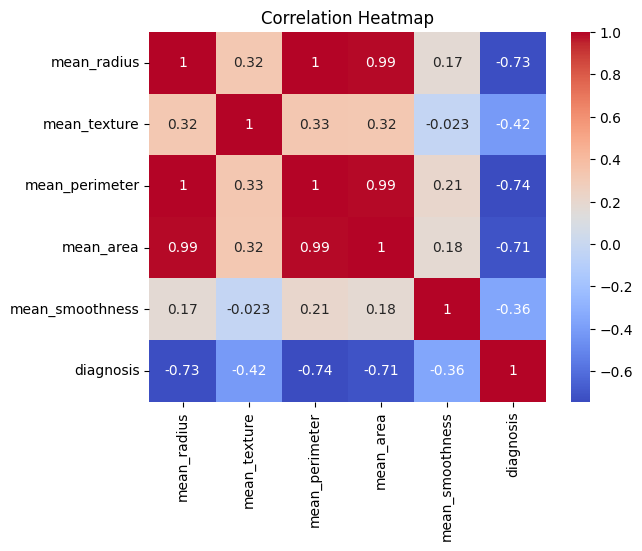

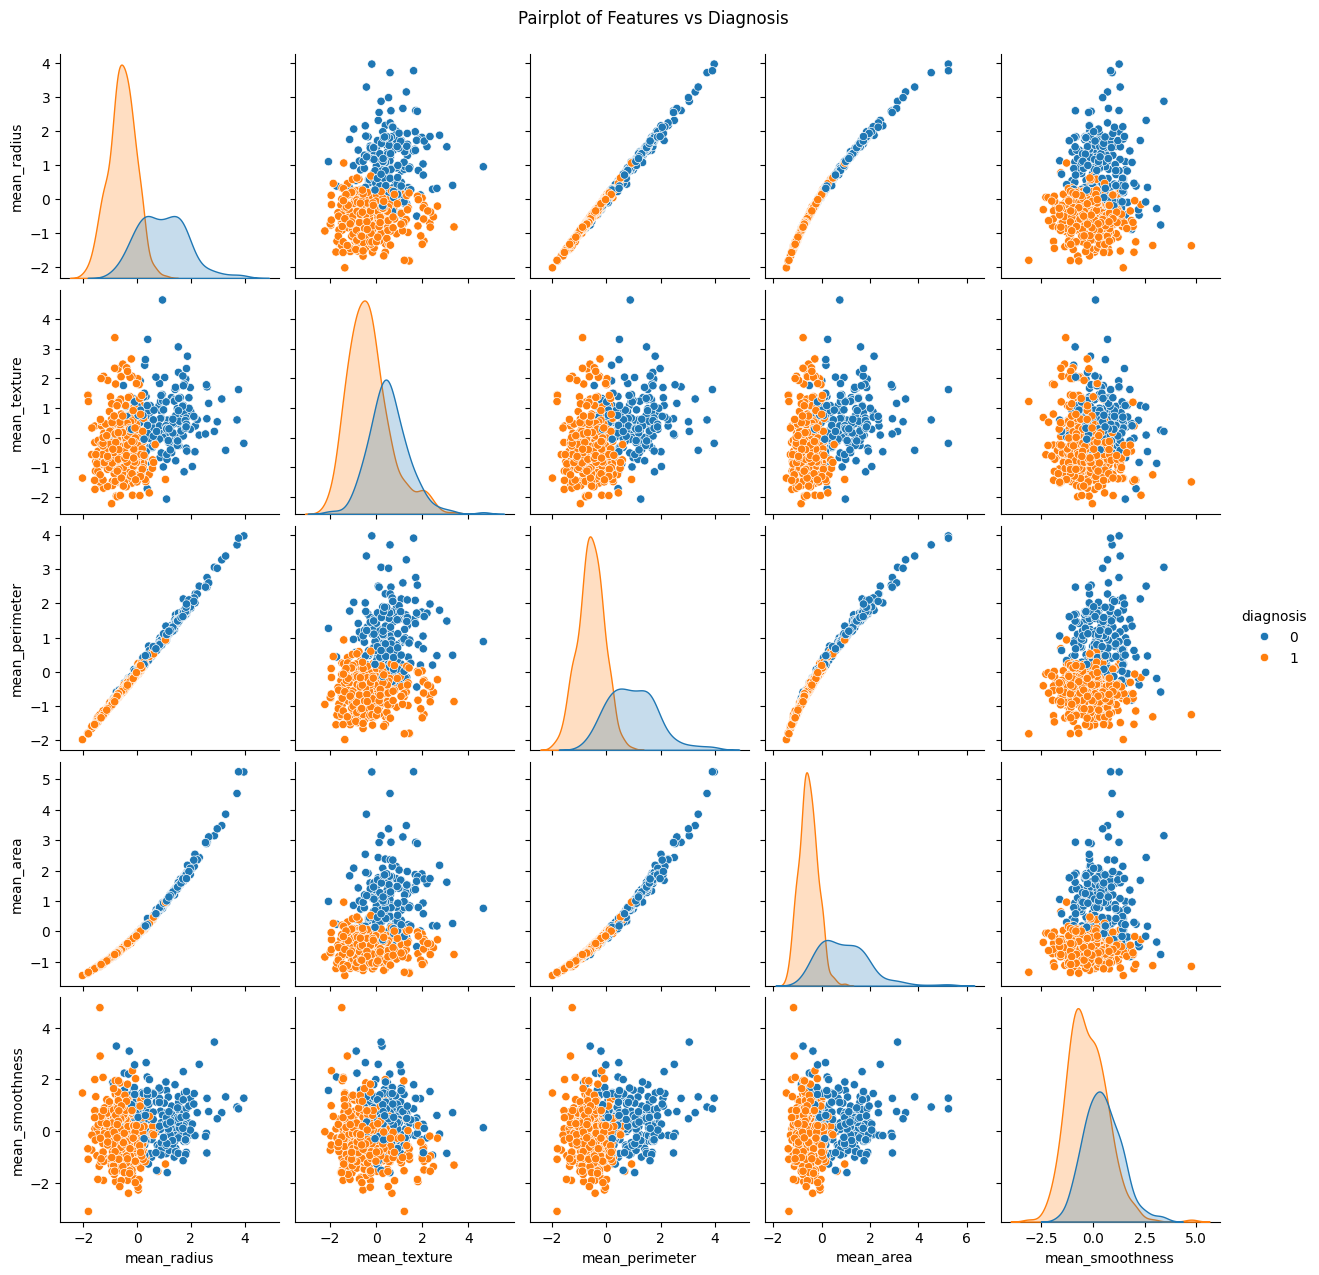

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data_scaled.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
data_scaled["diagnosis"] = data_scaled["diagnosis"].astype(str)
sns.pairplot(data_scaled.iloc[:, :6], hue="diagnosis")
plt.suptitle("Pairplot of Features vs Diagnosis", y=1.02)
plt.show()



--- Kernel: linear ---
Accuracy: 0.9473684210526315
Confusion Matrix:
 [[ 57   6]
 [  3 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171


--- Kernel: poly ---
Accuracy: 0.8947368421052632
Confusion Matrix:
 [[ 45  18]
 [  0 108]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        63
           1       0.86      1.00      0.92       108

    accuracy                           0.89       171
   macro avg       0.93      0.86      0.88       171
weighted avg       0.91      0.89      0.89       171


--- Kernel: rbf ---
Accuracy: 0.9473684210526315
Confusion Matrix:
 [[ 58   5]
 [  4 104]]
Classification Rep

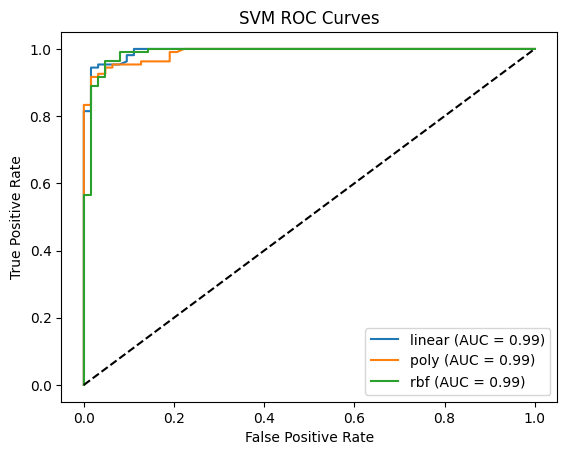

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel, probability=True, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n--- Kernel: {kernel} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{kernel} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.title("SVM ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Breast_cancer_data.csv")

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

param_grid = {'alpha': [0.0001, 0.001, 0.01]}
grid_search = GridSearchCV(MLPClassifier(max_iter=300), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)


Best Alpha: 0.01


In [ ]:
models = {
    "Simple (10 neurons, Sigmoid)": MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', alpha=best_alpha, max_iter=300),
    "Deep (64-32-16, Sigmoid)": MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='logistic', alpha=best_alpha, max_iter=300),
    "Simple (10 neurons, ReLU)": MLPClassifier(hidden_layer_sizes=(10,), activation='relu', alpha=best_alpha, max_iter=300),
    "Deep (64-32-16, ReLU)": MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', alpha=best_alpha, max_iter=300)
}


In [ ]:
results = {}

for name, model in models.items():
    print(f"\nTraining model: {name}")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
    print("--------------------------------------------------")



Training model: Simple (10 neurons, Sigmoid)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9240
Confusion Matrix:
 [[ 57   7]
 [  6 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.94      0.94      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation scores: [0.88596491 0.92982456 0.93859649 0.94736842 0.91150442]
Mean CV accuracy: 0.9227
--------------------------------------------------

Training model: Deep (64-32-16, Sigmoid)
Accuracy: 0.8947
Confusion Matrix:
 [[60  4]
 [14 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        64
           1       0.96      0.87      0.91       107

    accuracy                           0.89       171
   macro avg       0.88      0.90      0.89       171
weighted avg       0.90      0.89      0.90       171



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores: [0.90350877 0.94736842 0.95614035 0.93859649 0.89380531]
Mean CV accuracy: 0.9279
--------------------------------------------------

Training model: Simple (10 neurons, ReLU)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9123
Confusion Matrix:
 [[60  4]
 [11 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        64
           1       0.96      0.90      0.93       107

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores: [0.89473684 0.94736842 0.95614035 0.92982456 0.92035398]
Mean CV accuracy: 0.9297
--------------------------------------------------

Training model: Deep (64-32-16, ReLU)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9123
Confusion Matrix:
 [[60  4]
 [11 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        64
           1       0.96      0.90      0.93       107

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores: [0.90350877 0.93859649 0.93859649 0.94736842 0.89380531]
Mean CV accuracy: 0.9244
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


<ipython-input-9-8d7a2783fbbc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


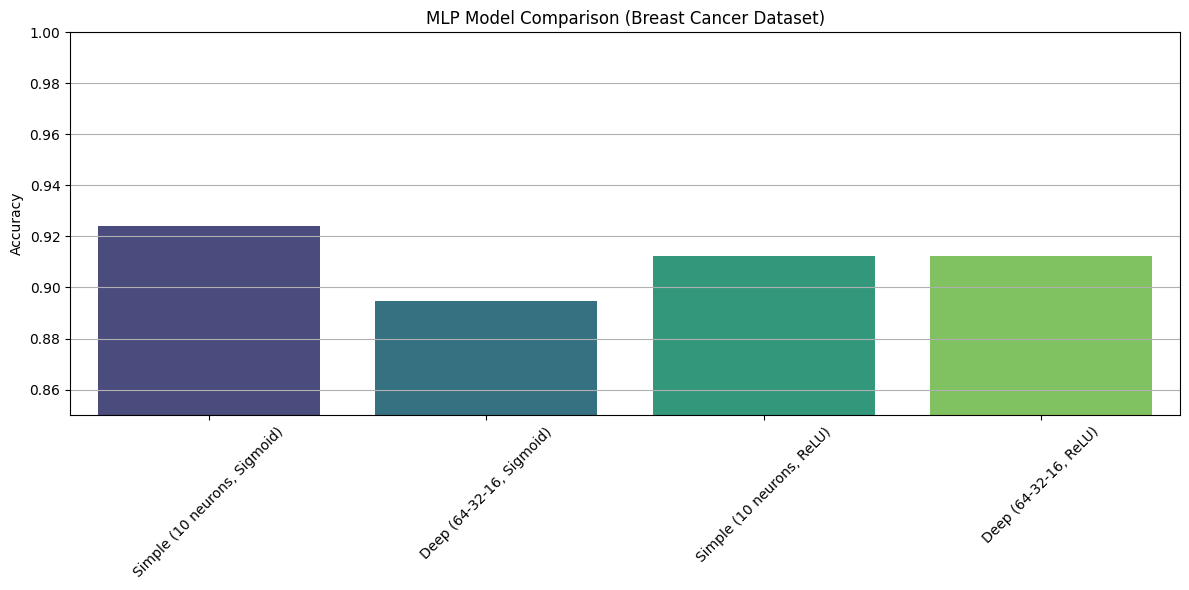

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.ylabel("Accuracy")
plt.title("MLP Model Comparison (Breast Cancer Dataset)")
plt.xticks(rotation=45)
plt.ylim(0.85, 1.0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


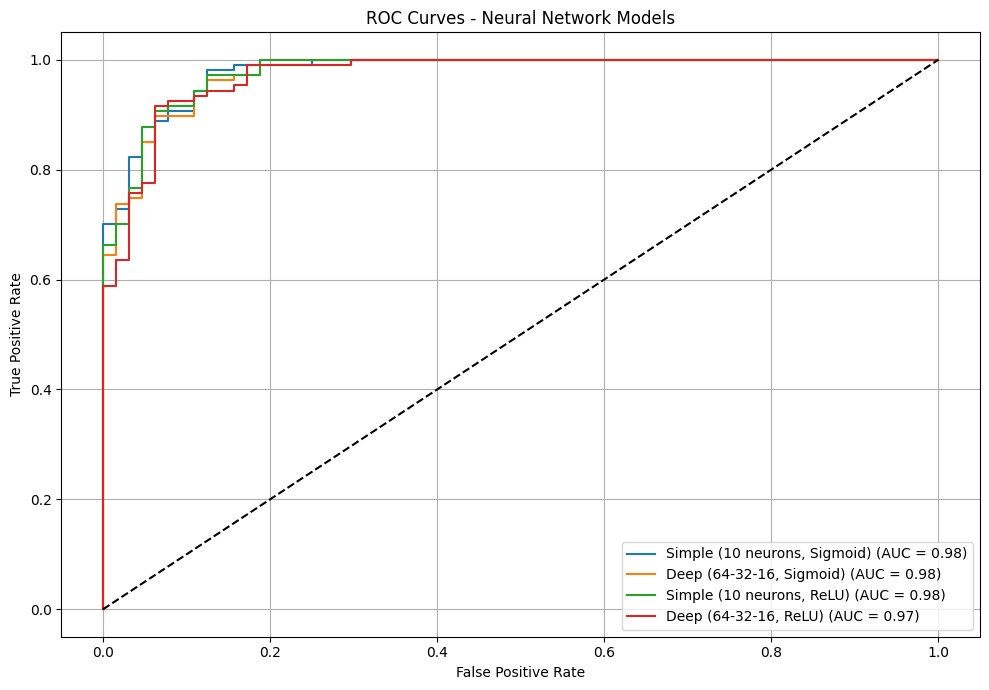

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Neural Network Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
